In [1]:
import colorednoise as cn
import allantools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [39]:
def Rn(x, K):
    N = len(x)
    M = int((N/K))
    R = np.array([])
    for n in range(0,M):
        R = np.append(R, np.mean(x[n*K:n*K+K]))
    return R

def adev(x, K):
    N = len(x)
    M = int((N/K))
    R = np.array([])
    for n in range(0,M):
        R = np.append(R, np.mean(x[n*K:n*K+K]))
    ad = (1/(2*M))*np.mean(np.diff(R,n=1)**2)
    return ad

def adev_array(y):
    adev_array = np.array([])
    
    L = int(len(y))
    maxM = 2**np.floor(np.log2(L/2))
    m = np.logspace(np.log10(1), np.log10(maxM), 200)
    K_span = np.ceil(m).astype(int)   
#     K_span = np.arange(1,int(len(y)/2),2)
    for K in K_span:
        adev_array = np.append(adev_array, adev(y,K))
    return K_span*8.28, adev_array

<IPython.core.display.Javascript object>


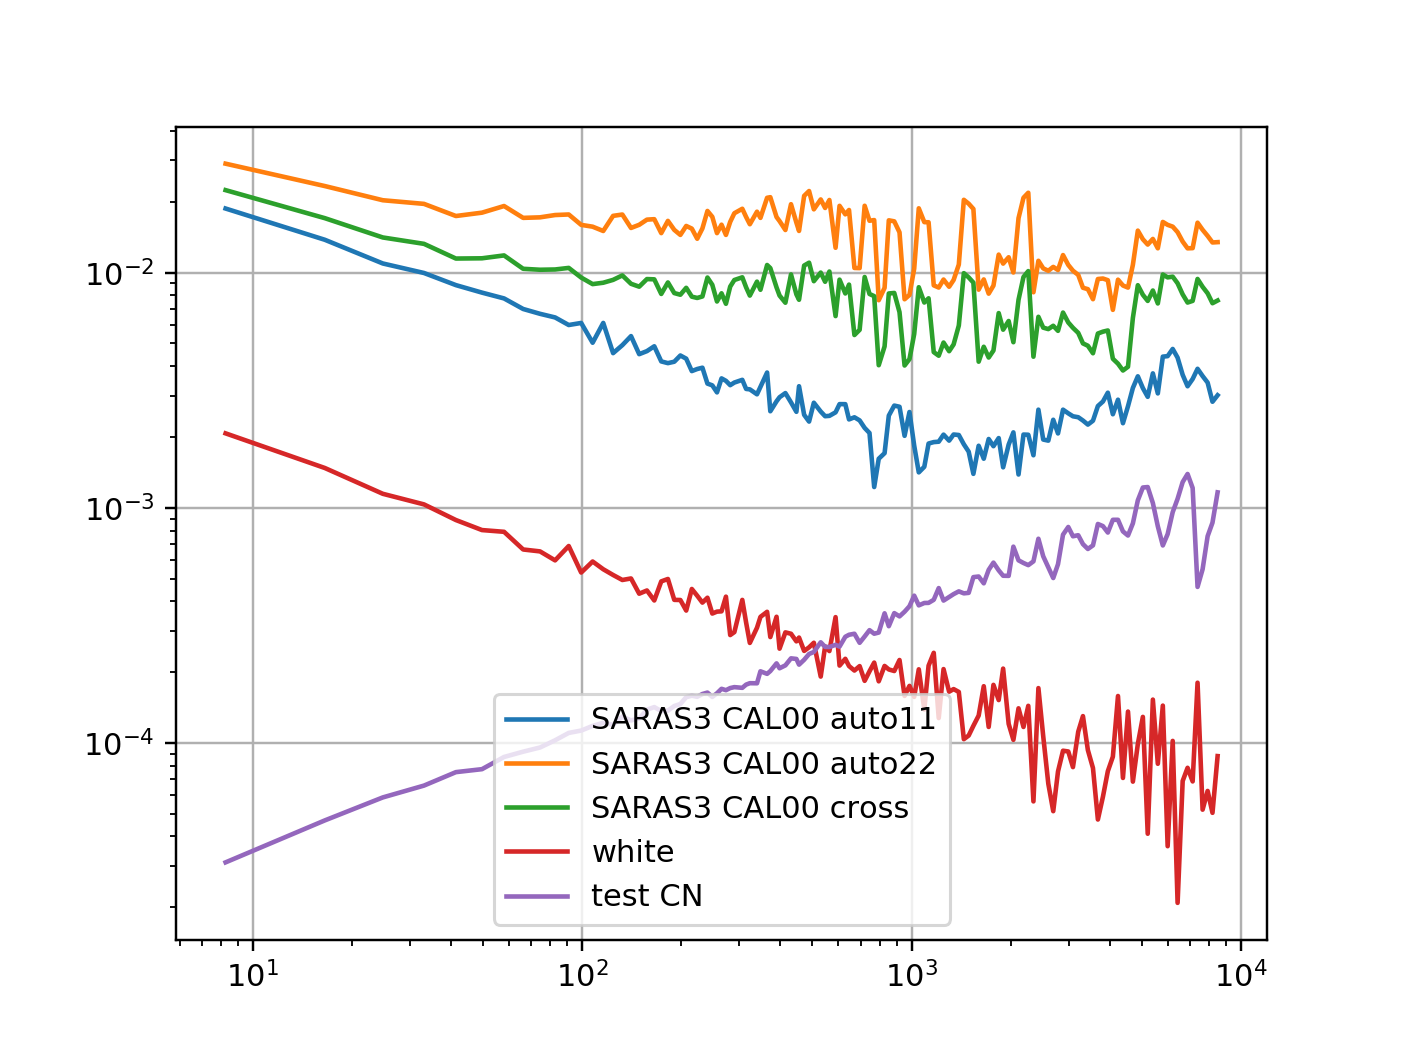

In [40]:
plt.figure()

# lst = np.loadtxt("real_autos_cal00_137.txt", usecols=0, skiprows=9)
auto11 = np.loadtxt("real_autos_cal00_137.txt", usecols=1, skiprows=9)[0:3465]
auto11 = np.diff(auto11)
K_span, adevs = adev_array(auto11)
plt.loglog(K_span, np.sqrt(adevs), label="SARAS3 CAL00 auto11")

auto22 = np.loadtxt("real_autos_cal00_137.txt", usecols=1, skiprows=9)[3465:-1]
auto22 = np.diff(auto22)
K_span, adevs = adev_array(auto22)
plt.loglog(K_span, np.sqrt(adevs), label="SARAS3 CAL00 auto22")

# lst = np.loadtxt("real_12_cal00_137.txt", usecols=0, skiprows=8)
cross = np.loadtxt("real_12_cal00_137.txt", usecols=1, skiprows=8)
cross = np.diff(cross)
K_span, adevs = adev_array(cross)
plt.loglog(K_span, np.sqrt(adevs), label="SARAS3 CAL00 cross")

# y = allantools.noise.pink(3465)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="pink")

y = allantools.noise.white(3465)*0.1
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="white")

beta = 3 # the exponent
y = cn.powerlaw_psd_gaussian(beta, 3465)
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="test CN")

# t = np.linspace(0,2,3465)
# t = np.polyval([-3,0,1], t)
# y = allantools.noise.white(3465)*0.1*t 
# y = np.diff(y)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="white+drift"

# y = allantools.noise.brown(3465) 
# y = np.diff(y)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="brown")

plt.legend(loc='best')
plt.grid()

<IPython.core.display.Javascript object>


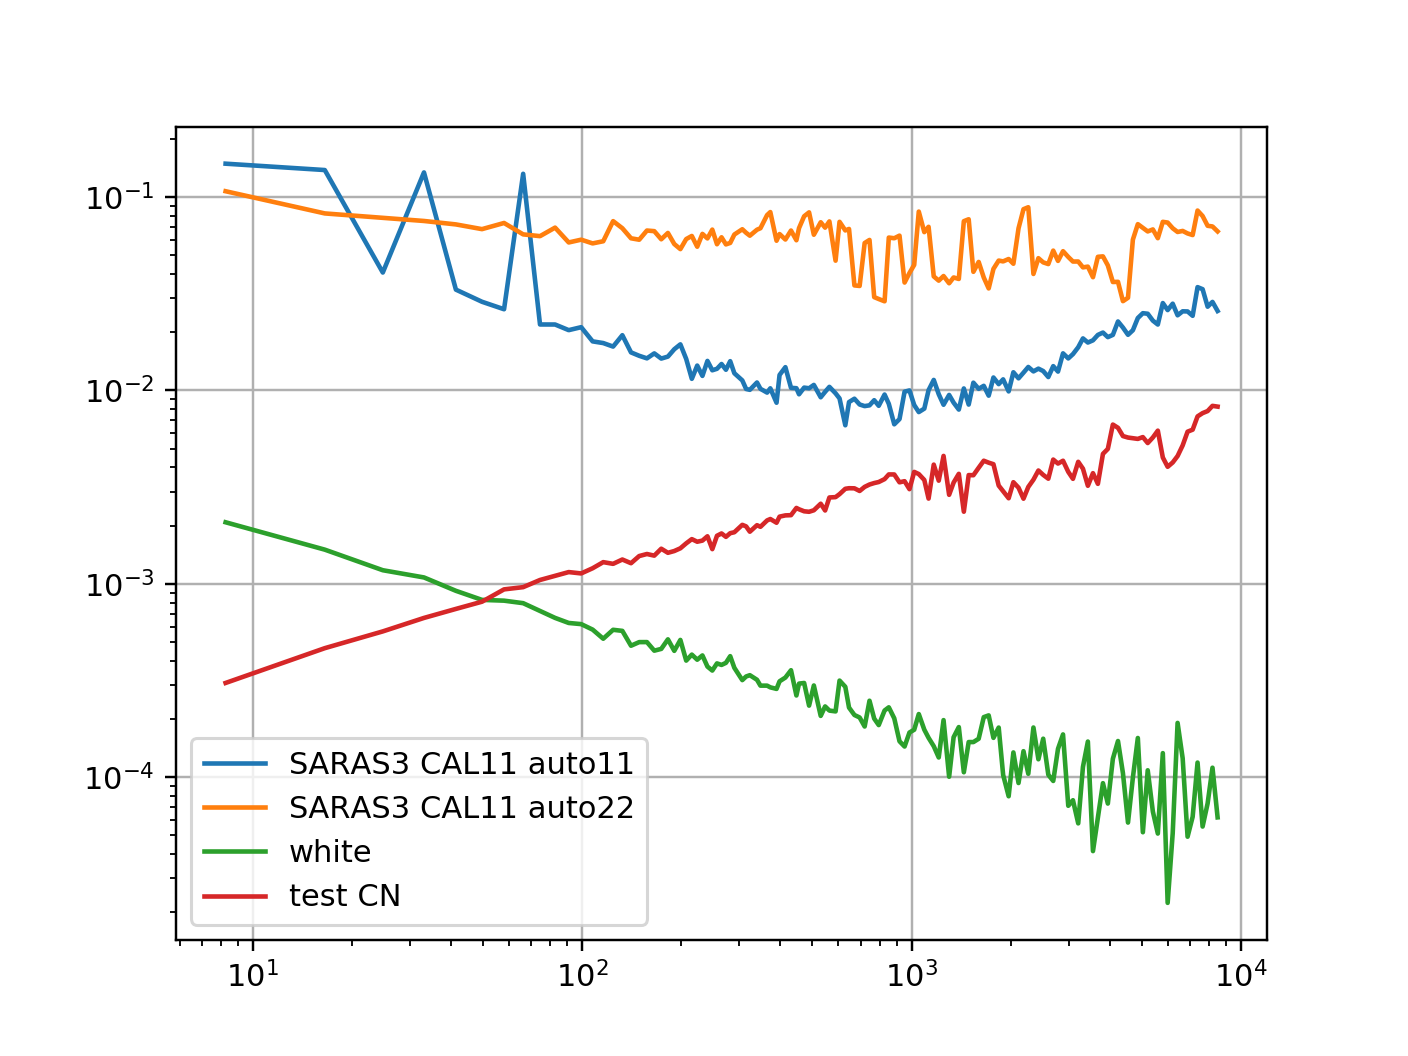

In [43]:
plt.figure()

# lst = np.loadtxt("real_autos_cal00_137.txt", usecols=0, skiprows=9)
auto11 = np.loadtxt("real_autos_cal11_137.txt", usecols=1, skiprows=9)[0:3465]
auto11 = np.diff(auto11)
K_span, adevs = adev_array(auto11)
plt.loglog(K_span, np.sqrt(adevs), label="SARAS3 CAL11 auto11")

auto22 = np.loadtxt("real_autos_cal11_137.txt", usecols=1, skiprows=9)[3465:]
auto22 = np.diff(auto22)
K_span, adevs = adev_array(auto22)
plt.loglog(K_span, np.sqrt(adevs), label="SARAS3 CAL11 auto22")

# y = allantools.noise.pink(3465)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="pink")

# y = allantools.noise.brown(3465) 
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="brown")

y = allantools.noise.white(3465)*0.1
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="white")

beta = 3 # the exponent
y = cn.powerlaw_psd_gaussian(beta, 3465)*10
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="test CN")

# t = np.linspace(0,10,3465)
# y = np.random.normal(t,1,len(t)) 
# y = np.diff(y)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="white+drift")

# y = allantools.noise.brown(3465) 
# y = np.diff(y)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="brown")

plt.legend(loc='best')
plt.grid()

In [42]:
# lst = np.loadtxt("real_autos_cal00_137.txt", usecols=0, skiprows=9)
# print((lst[1]-lst[0])*60*60)